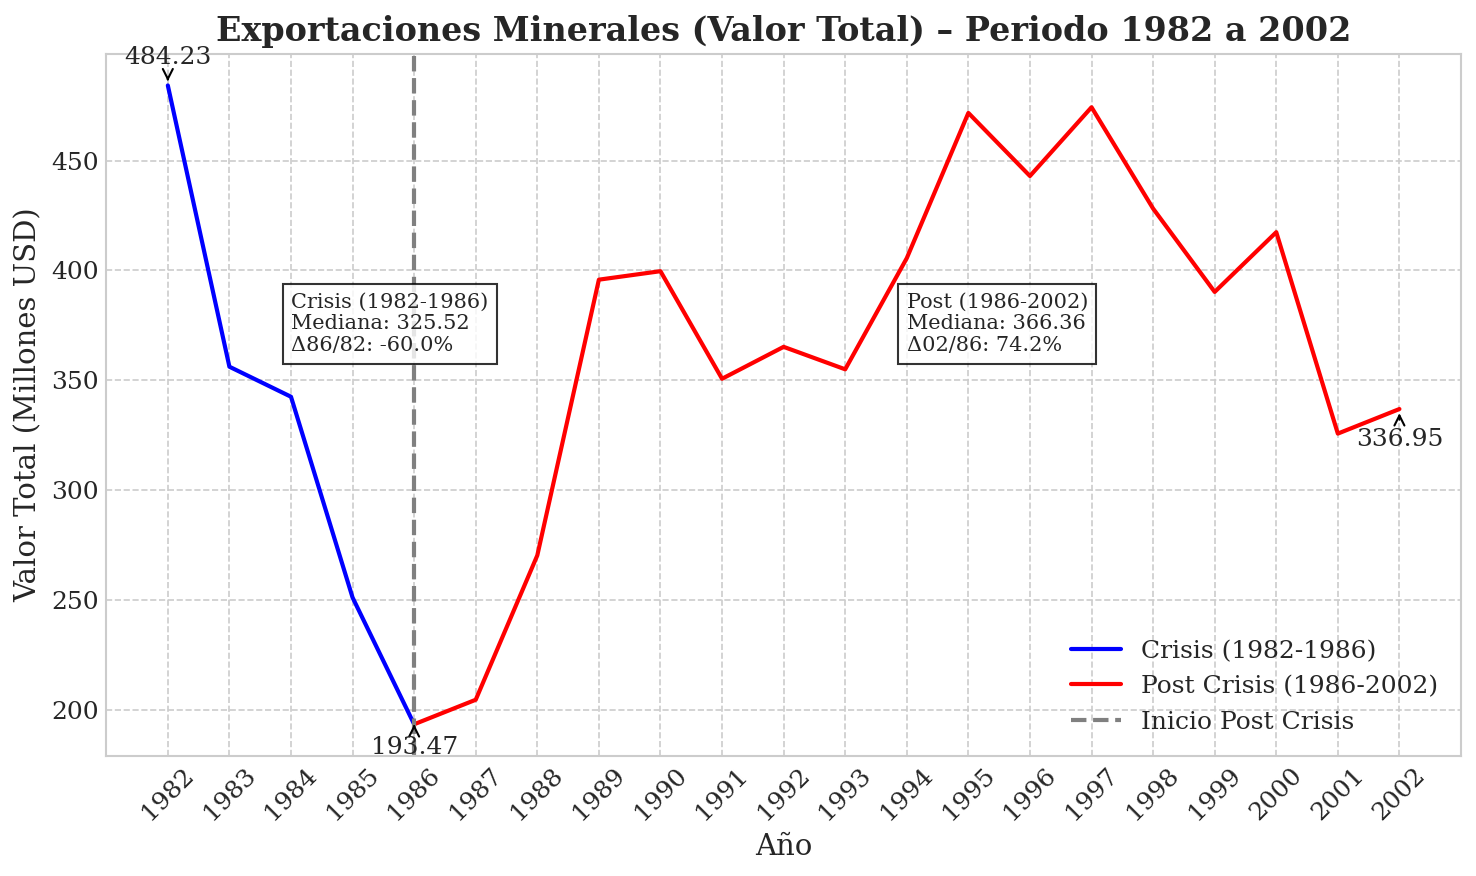

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns

# --- Funciones de estadísticas ajustadas a periodo 2 (82‑86 y 86‑02) ---
def cuadro_estadisticas(serie):
    mean = serie.loc[1982:1986].mean()
    delta = (serie.loc[1986] - serie.loc[1982]) / serie.loc[1982] * 100
    return (f"Crisis (1982‑1986)\nMediana: {mean:.2f}\n"
            f"Δ86/82: {delta:.1f}%")

def cuadro_estadisticas_post(serie):
    mean = serie.loc[1986:2002].mean()
    delta = (serie.loc[2002] - serie.loc[1986]) / serie.loc[1986] * 100
    return (f"Post (1986‑2002)\nMediana: {mean:.2f}\n"
            f"Δ02/86: {delta:.1f}%")

# --- Estilo profesional ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family':    'serif',
    'font.size':      12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'grid.linestyle': '--',
    'lines.linewidth':2,
    'figure.dpi':     150,
    'savefig.bbox':   'tight'
})

# --- Carga de datos ---
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_minerales = pd.read_sql_query("SELECT * FROM exportaciones_minerales_totales", conn)
conn.close()

df_minerales.set_index('año', inplace=True)
df_minerales = df_minerales.loc[1982:2002]

# --- Calcular valor_total en millones ---
valor_cols = [
    'estaño_valor','plomo_valor','zinc_valor','plata_valor',
    'wolfram_valor','cobre_valor','antimonio_valor','oro_valor'
]
df_minerales["valor_total"] = df_minerales[valor_cols].sum(axis=1) / 1000

# --- Segmentar en Crisis y Post-Crisis ---
df_crisis = df_minerales.loc[1982:1986]
df_post   = df_minerales.loc[1986:2002]
df_full   = df_minerales

# --- Crear figura y eje ---
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar crisis y post‑crisis
ax.plot(df_crisis.index, df_crisis['valor_total'],
        color='blue', label='Crisis (1982-1986)')
ax.plot(df_post.index, df_post['valor_total'],
        color='red',  label='Post Crisis (1986-2002)')

# Línea vertical separadora en 1986
ax.axvline(x=1986, color='gray', linestyle='--', linewidth=2,
           label='Inicio Post Crisis')

# Anotaciones en años clave: 1982, 1986, 2002
offsets = {1982: 1.02, 1986: 0.93, 2002: 0.95}
for year in (1982, 1986, 2002):
    if year in df_full.index:
        value = df_full.loc[year, 'valor_total']
        factor = offsets.get(year, 1.05)
        ax.annotate(f"{value:.2f}",
                    xy=(year, value),
                    xytext=(year, value * factor),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=12, ha='center')

# Cuadros de estadísticas
ax.text(1984, df_full['valor_total'].max() * 0.75,
        cuadro_estadisticas(df_crisis['valor_total']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
ax.text(1994, df_full['valor_total'].max() * 0.75,
        cuadro_estadisticas_post(df_post['valor_total']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Etiquetas, título y leyenda
ax.set_title('Exportaciones Minerales (Valor Total) – Periodo 1982 a 2002',
             fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Valor Total (Millones USD)')
ax.set_xticks(range(1982, 2003))
ax.tick_params(axis='x', labelrotation=45)
ax.legend()

plt.tight_layout()

# --- Guardar imagen ---
output_dir = "../../../assets/tesis/neoliberalismo/serie_completa"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "minerales_valor_total_82_02.png"))
plt.show()
